In [577]:
# libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [579]:
data = pd.read_csv('Food_Delivery_Time_Prediction.csv')
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [583]:
df= data.drop(columns = ['Order_ID', 'Customer_Location',
       'Delivery_Person_Experience', 'Order_Priority','Restaurant_Location','Order_Time',
        'Restaurant_Rating', 'Customer_Rating',
           'Tip_Amount'])

In [586]:
df.columns

Index(['Distance', 'Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type',
       'Delivery_Time', 'Order_Cost'],
      dtype='object')

In [588]:
df.isnull().sum()

Distance              0
Weather_Conditions    0
Traffic_Conditions    0
Vehicle_Type          0
Delivery_Time         0
Order_Cost            0
dtype: int64

In [590]:
df_encoded = pd.get_dummies(df, columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type'])
# df_encoded = df_encoded.astype(int)
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
0,1.57,26.22,1321.10,False,True,False,False,False,False,True,False,False,True
1,21.32,62.61,152.21,True,False,False,False,False,False,True,False,False,True
2,6.95,48.43,1644.38,False,False,True,False,False,False,True,False,True,False
3,13.79,111.63,541.25,True,False,False,False,False,True,False,False,True,False
4,6.72,32.38,619.81,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23.82,50.39,1432.26,True,False,False,False,True,False,False,False,True,False
196,6.09,90.54,1720.25,False,False,True,False,False,False,True,True,False,False
197,20.61,73.20,1356.58,False,False,True,False,True,False,False,False,True,False
198,24.06,53.94,354.39,False,True,False,False,True,False,False,False,False,True


In [592]:

scaler = StandardScaler()
df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']] = scaler.fit_transform(df_encoded[['Distance', 'Delivery_Time', 'Order_Cost']])
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
0,-1.454738,-1.487932,0.501852,False,True,False,False,False,False,True,False,False,True
1,1.439192,-0.264987,-1.634294,True,False,False,False,False,False,True,False,False,True
2,-0.666417,-0.741529,1.092646,False,False,True,False,False,False,True,False,True,False
3,0.335835,1.382411,-0.923323,True,False,False,False,False,True,False,False,True,False
4,-0.700119,-1.280915,-0.779755,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.805512,-0.675660,0.704997,True,False,False,False,True,False,False,False,True,False
196,-0.792431,0.673647,1.231298,False,False,True,False,False,False,True,True,False,False
197,1.335157,0.090908,0.566692,False,False,True,False,True,False,False,False,True,False
198,1.840679,-0.556356,-1.264810,False,True,False,False,True,False,False,False,False,True


In [594]:
print(df_encoded.describe())


           Distance  Delivery_Time    Order_Cost
count  2.000000e+02   2.000000e+02  2.000000e+02
mean  -1.643130e-16   3.730349e-16 -2.042810e-16
std    1.002509e+00   1.002509e+00  1.002509e+00
min   -1.608593e+00  -1.857269e+00 -1.688954e+00
25%   -7.924313e-01  -7.896704e-01 -9.013569e-01
50%   -1.806765e-01   7.662482e-02 -1.925947e-02
75%    7.325599e-01   8.789834e-01  9.076026e-01
max    1.963762e+00   1.652608e+00  1.737826e+00


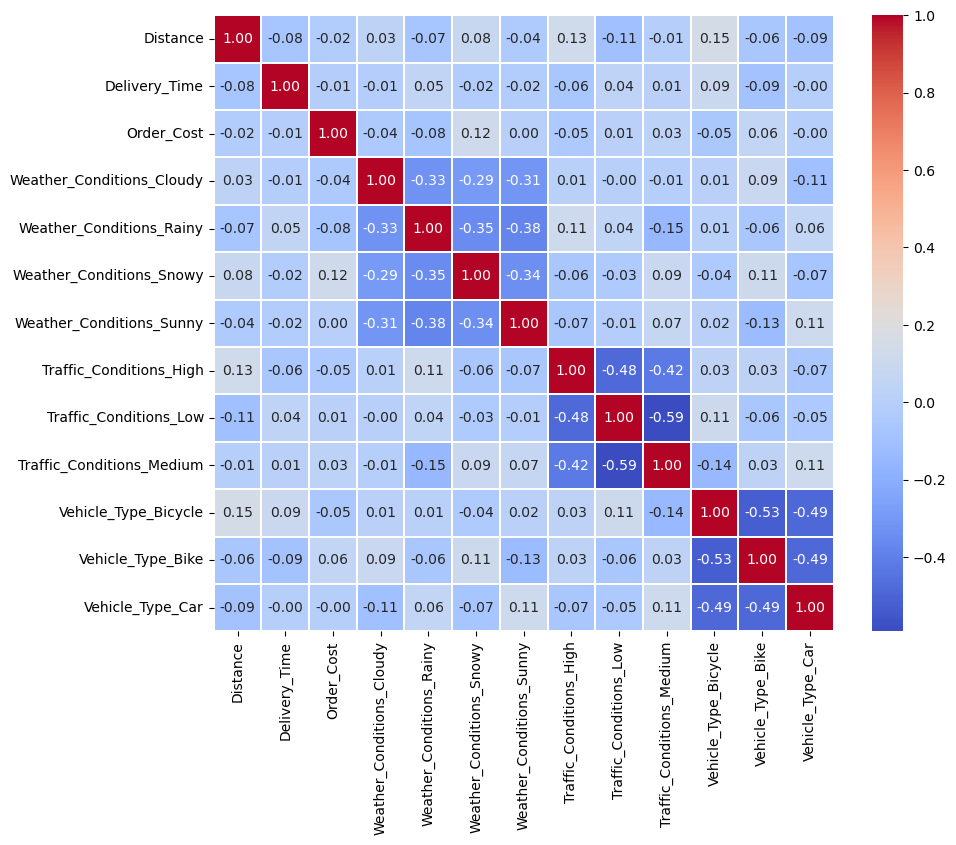

In [596]:
import seaborn as sns
import matplotlib.pyplot as plt
df_encoded =df_encoded.corr()
plt.figure(figsize =(10,8))

sns.heatmap(df_encoded,annot = True,cmap ='coolwarm',fmt=".2f",linewidths=0.1)
plt.show()

In [598]:
print(df_encoded["Delivery_Time"].sort_values(ascending=False))
      

Delivery_Time                1.000000
Vehicle_Type_Bicycle         0.093194
Weather_Conditions_Rainy     0.054402
Traffic_Conditions_Low       0.039714
Traffic_Conditions_Medium    0.011810
Vehicle_Type_Car            -0.001372
Order_Cost                  -0.009307
Weather_Conditions_Cloudy   -0.012272
Weather_Conditions_Sunny    -0.020492
Weather_Conditions_Snowy    -0.024621
Traffic_Conditions_High     -0.057563
Distance                    -0.075143
Vehicle_Type_Bike           -0.091859
Name: Delivery_Time, dtype: float64


In [600]:
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
Distance,1.000000,-0.075143,-0.022275,0.033622,-0.070825,0.082485,-0.038408,0.126437,-0.105983,-0.006507,0.145851,-0.057526,-0.090784
Delivery_Time,-0.075143,1.000000,-0.009307,-0.012272,0.054402,-0.024621,-0.020492,-0.057563,0.039714,0.011810,0.093194,-0.091859,-0.001372
Order_Cost,-0.022275,-0.009307,1.000000,-0.041711,-0.080923,0.123021,0.002218,-0.045169,0.013153,0.027931,-0.053987,0.056296,-0.002373
Weather_Conditions_Cloudy,0.033622,-0.012272,-0.041711,1.000000,-0.325511,-0.289731,-0.309582,0.008168,-0.000250,-0.007256,0.013170,0.090641,-0.106701
Weather_Conditions_Rainy,-0.070825,0.054402,-0.080923,-0.325511,1.000000,-0.354787,-0.379096,0.113467,0.043209,-0.149178,0.007806,-0.062096,0.055801
Weather_Conditions_Snowy,0.082485,-0.024621,0.123021,-0.289731,-0.354787,1.000000,-0.337426,-0.060167,-0.034343,0.090948,-0.038420,0.109348,-0.072903
Weather_Conditions_Sunny,-0.038408,-0.020492,0.002218,-0.309582,-0.379096,-0.337426,1.000000,-0.065372,-0.010732,0.071270,0.017040,-0.125956,0.111947
Traffic_Conditions_High,0.126437,-0.057563,-0.045169,0.008168,0.113467,-0.060167,-0.065372,1.000000,-0.482682,-0.419913,0.033905,0.033905,-0.069698
Traffic_Conditions_Low,-0.105983,0.039714,0.013153,-0.000250,0.043209,-0.034343,-0.010732,-0.482682,1.000000,-0.592157,0.108312,-0.063101,-0.046469
Traffic_Conditions_Medium,-0.006507,0.011810,0.027931,-0.007256,-0.149178,0.090948,0.071270,-0.419913,-0.592157,1.000000,-0.143437,0.034194,0.112284


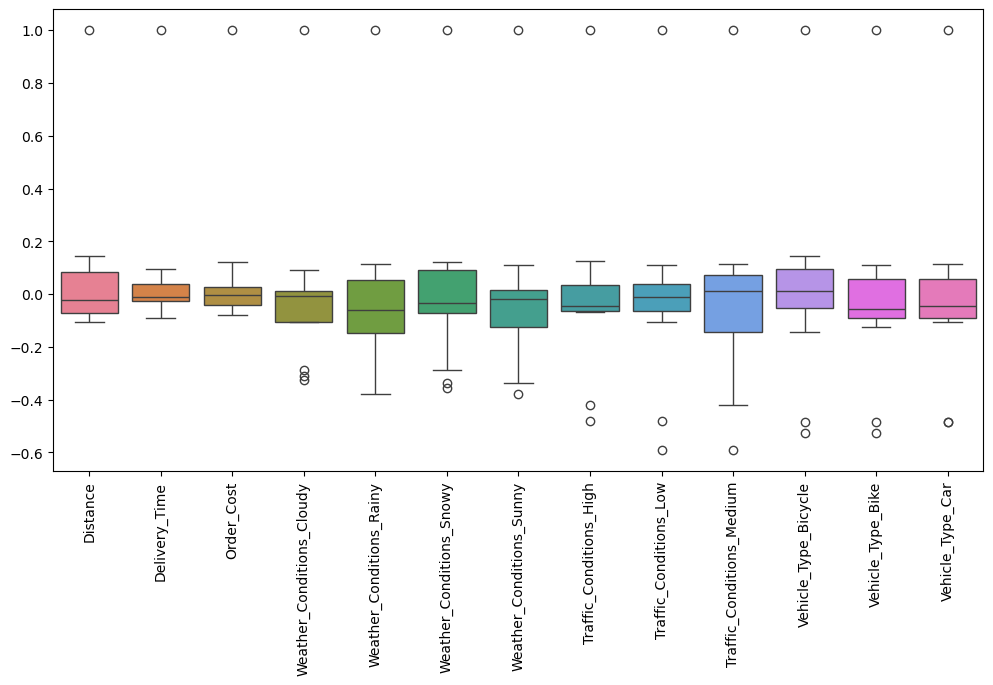

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(df_encoded)
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()



In [604]:
df

,Distance,Weather_Conditions,Traffic_Conditions,Vehicle_Type,Delivery_Time,Order_Cost
0,1.57,Rainy,Medium,Car,26.22,1321.10
1,21.32,Cloudy,Medium,Car,62.61,152.21
2,6.95,Snowy,Medium,Bike,48.43,1644.38
3,13.79,Cloudy,Low,Bike,111.63,541.25
4,6.72,Rainy,High,Bike,32.38,619.81
...,...,...,...,...,...,...
195,23.82,Cloudy,High,Bike,50.39,1432.26
196,6.09,Snowy,Medium,Bicycle,90.54,1720.25
197,20.61,Snowy,High,Bike,73.20,1356.58
198,24.06,Rainy,High,Car,53.94,354.39


In [606]:
df_encoded['Rest_lat'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[0].astype(float)
df_encoded['Rest_lon'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[1].astype(float)

In [608]:
df_encoded['cus_lat'] = data['Customer_Location'].str.strip("()").str.split(",").str[0].astype(float)
df_encoded['cus_lon'] = data['Customer_Location'].str.strip("()").str.split(",").str[1].astype(float)

In [610]:

from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

df_encoded["Distance"] = df_encoded.apply(lambda row: haversine(row["Rest_lat"], row["Rest_lon"], 
                                                 row["cus_lat"], row["cus_lon"]), axis=1)


In [612]:
df_encoded['Order_Time'] = data['Order_Time']
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Rest_lat,Rest_lon,cus_lat,cus_lon,Order_Time
Distance,NaN,-0.075143,-0.022275,0.033622,-0.070825,0.082485,-0.038408,0.126437,-0.105983,-0.006507,0.145851,-0.057526,-0.090784,NaN,NaN,NaN,NaN,NaN
Delivery_Time,NaN,1.000000,-0.009307,-0.012272,0.054402,-0.024621,-0.020492,-0.057563,0.039714,0.011810,0.093194,-0.091859,-0.001372,NaN,NaN,NaN,NaN,NaN
Order_Cost,NaN,-0.009307,1.000000,-0.041711,-0.080923,0.123021,0.002218,-0.045169,0.013153,0.027931,-0.053987,0.056296,-0.002373,NaN,NaN,NaN,NaN,NaN
Weather_Conditions_Cloudy,NaN,-0.012272,-0.041711,1.000000,-0.325511,-0.289731,-0.309582,0.008168,-0.000250,-0.007256,0.013170,0.090641,-0.106701,NaN,NaN,NaN,NaN,NaN
Weather_Conditions_Rainy,NaN,0.054402,-0.080923,-0.325511,1.000000,-0.354787,-0.379096,0.113467,0.043209,-0.149178,0.007806,-0.062096,0.055801,NaN,NaN,NaN,NaN,NaN
Weather_Conditions_Snowy,NaN,-0.024621,0.123021,-0.289731,-0.354787,1.000000,-0.337426,-0.060167,-0.034343,0.090948,-0.038420,0.109348,-0.072903,NaN,NaN,NaN,NaN,NaN
Weather_Conditions_Sunny,NaN,-0.020492,0.002218,-0.309582,-0.379096,-0.337426,1.000000,-0.065372,-0.010732,0.071270,0.017040,-0.125956,0.111947,NaN,NaN,NaN,NaN,NaN
Traffic_Conditions_High,NaN,-0.057563,-0.045169,0.008168,0.113467,-0.060167,-0.065372,1.000000,-0.482682,-0.419913,0.033905,0.033905,-0.069698,NaN,NaN,NaN,NaN,NaN
Traffic_Conditions_Low,NaN,0.039714,0.013153,-0.000250,0.043209,-0.034343,-0.010732,-0.482682,1.000000,-0.592157,0.108312,-0.063101,-0.046469,NaN,NaN,NaN,NaN,NaN
Traffic_Conditions_Medium,NaN,0.011810,0.027931,-0.007256,-0.149178,0.090948,0.071270,-0.419913,-0.592157,1.000000,-0.143437,0.034194,0.112284,NaN,NaN,NaN,NaN,NaN


In [614]:
df_encoded =df_encoded.fillna(0)

/tmp/ipykernel_6914/624878645.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded =df_encoded.fillna(0)


In [616]:
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Rest_lat,Rest_lon,cus_lat,cus_lon,Order_Time
Distance,0.0,-0.075143,-0.022275,0.033622,-0.070825,0.082485,-0.038408,0.126437,-0.105983,-0.006507,0.145851,-0.057526,-0.090784,0.0,0.0,0.0,0.0,0
Delivery_Time,0.0,1.000000,-0.009307,-0.012272,0.054402,-0.024621,-0.020492,-0.057563,0.039714,0.011810,0.093194,-0.091859,-0.001372,0.0,0.0,0.0,0.0,0
Order_Cost,0.0,-0.009307,1.000000,-0.041711,-0.080923,0.123021,0.002218,-0.045169,0.013153,0.027931,-0.053987,0.056296,-0.002373,0.0,0.0,0.0,0.0,0
Weather_Conditions_Cloudy,0.0,-0.012272,-0.041711,1.000000,-0.325511,-0.289731,-0.309582,0.008168,-0.000250,-0.007256,0.013170,0.090641,-0.106701,0.0,0.0,0.0,0.0,0
Weather_Conditions_Rainy,0.0,0.054402,-0.080923,-0.325511,1.000000,-0.354787,-0.379096,0.113467,0.043209,-0.149178,0.007806,-0.062096,0.055801,0.0,0.0,0.0,0.0,0
Weather_Conditions_Snowy,0.0,-0.024621,0.123021,-0.289731,-0.354787,1.000000,-0.337426,-0.060167,-0.034343,0.090948,-0.038420,0.109348,-0.072903,0.0,0.0,0.0,0.0,0
Weather_Conditions_Sunny,0.0,-0.020492,0.002218,-0.309582,-0.379096,-0.337426,1.000000,-0.065372,-0.010732,0.071270,0.017040,-0.125956,0.111947,0.0,0.0,0.0,0.0,0
Traffic_Conditions_High,0.0,-0.057563,-0.045169,0.008168,0.113467,-0.060167,-0.065372,1.000000,-0.482682,-0.419913,0.033905,0.033905,-0.069698,0.0,0.0,0.0,0.0,0
Traffic_Conditions_Low,0.0,0.039714,0.013153,-0.000250,0.043209,-0.034343,-0.010732,-0.482682,1.000000,-0.592157,0.108312,-0.063101,-0.046469,0.0,0.0,0.0,0.0,0
Traffic_Conditions_Medium,0.0,0.011810,0.027931,-0.007256,-0.149178,0.090948,0.071270,-0.419913,-0.592157,1.000000,-0.143437,0.034194,0.112284,0.0,0.0,0.0,0.0,0



print(unique_order_times)


In [619]:
# Mapping of descriptive labels to hours
time_map = {
    "Night": [22, 23, 24],  # Late hours, e.g., 10 PM - 12 AM
    "Morning": [6, 7, 8, 9],      # Early hours, e.g., 6 AM - 9 AM
    "Afternoon": [12, 1, 2, 3, 4], # Afternoon hours, e.g., 12 PM - 4 PM
    "Evening": [5, 6, 7, 8, 9]    # Evening hours, e.g., 5 PM - 9 PM
}


In [621]:
# Function to convert descriptive time labels to hours
def time_to_hour(time_label):
    for label, hours in time_map.items():
        if time_label== label:  # Check if label matches
            return hours[0]  # Take the first hour in the list (e.g., 6 AM for "morning")
    return None  # If no match is found, return None (you can handle missing data accordingly)


In [623]:
# Apply the function to convert 'Order_Time' to hours
df_encoded['Order_Time'] = data['Order_Time'].apply(lambda x: time_to_hour(x) if time_to_hour(x) is not None else None)

# Check the result to see the actual hours after conversion
print(df_encoded['Order_Time'])


Distance                    NaN
Delivery_Time               NaN
Order_Cost                  NaN
Weather_Conditions_Cloudy   NaN
Weather_Conditions_Rainy    NaN
Weather_Conditions_Snowy    NaN
Weather_Conditions_Sunny    NaN
Traffic_Conditions_High     NaN
Traffic_Conditions_Low      NaN
Traffic_Conditions_Medium   NaN
Vehicle_Type_Bicycle        NaN
Vehicle_Type_Bike           NaN
Vehicle_Type_Car            NaN
Name: Order_Time, dtype: float64


In [625]:
# Create the 'Rush_hour' feature
df_encoded["Rush_hour"] = df_encoded["Order_Time"].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Rest_lat,Rest_lon,cus_lat,cus_lon,Order_Time,Rush_hour
Distance,0.0,-0.075143,-0.022275,0.033622,-0.070825,0.082485,-0.038408,0.126437,-0.105983,-0.006507,0.145851,-0.057526,-0.090784,0.0,0.0,0.0,0.0,NaN,0
Delivery_Time,0.0,1.000000,-0.009307,-0.012272,0.054402,-0.024621,-0.020492,-0.057563,0.039714,0.011810,0.093194,-0.091859,-0.001372,0.0,0.0,0.0,0.0,NaN,0
Order_Cost,0.0,-0.009307,1.000000,-0.041711,-0.080923,0.123021,0.002218,-0.045169,0.013153,0.027931,-0.053987,0.056296,-0.002373,0.0,0.0,0.0,0.0,NaN,0
Weather_Conditions_Cloudy,0.0,-0.012272,-0.041711,1.000000,-0.325511,-0.289731,-0.309582,0.008168,-0.000250,-0.007256,0.013170,0.090641,-0.106701,0.0,0.0,0.0,0.0,NaN,0
Weather_Conditions_Rainy,0.0,0.054402,-0.080923,-0.325511,1.000000,-0.354787,-0.379096,0.113467,0.043209,-0.149178,0.007806,-0.062096,0.055801,0.0,0.0,0.0,0.0,NaN,0
Weather_Conditions_Snowy,0.0,-0.024621,0.123021,-0.289731,-0.354787,1.000000,-0.337426,-0.060167,-0.034343,0.090948,-0.038420,0.109348,-0.072903,0.0,0.0,0.0,0.0,NaN,0
Weather_Conditions_Sunny,0.0,-0.020492,0.002218,-0.309582,-0.379096,-0.337426,1.000000,-0.065372,-0.010732,0.071270,0.017040,-0.125956,0.111947,0.0,0.0,0.0,0.0,NaN,0
Traffic_Conditions_High,0.0,-0.057563,-0.045169,0.008168,0.113467,-0.060167,-0.065372,1.000000,-0.482682,-0.419913,0.033905,0.033905,-0.069698,0.0,0.0,0.0,0.0,NaN,0
Traffic_Conditions_Low,0.0,0.039714,0.013153,-0.000250,0.043209,-0.034343,-0.010732,-0.482682,1.000000,-0.592157,0.108312,-0.063101,-0.046469,0.0,0.0,0.0,0.0,NaN,0
Traffic_Conditions_Medium,0.0,0.011810,0.027931,-0.007256,-0.149178,0.090948,0.071270,-0.419913,-0.592157,1.000000,-0.143437,0.034194,0.112284,0.0,0.0,0.0,0.0,NaN,0


In [627]:
data['Order_Priority'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [629]:
df_encoded = df_encoded.fillna(0)

In [631]:
df_encoded["Order_Priority"] = data["Order_Priority"]
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Rest_lat,Rest_lon,cus_lat,cus_lon,Order_Time,Rush_hour,Order_Priority
Distance,0.0,-0.075143,-0.022275,0.033622,-0.070825,0.082485,-0.038408,0.126437,-0.105983,-0.006507,0.145851,-0.057526,-0.090784,0.0,0.0,0.0,0.0,0.0,0,NaN
Delivery_Time,0.0,1.000000,-0.009307,-0.012272,0.054402,-0.024621,-0.020492,-0.057563,0.039714,0.011810,0.093194,-0.091859,-0.001372,0.0,0.0,0.0,0.0,0.0,0,NaN
Order_Cost,0.0,-0.009307,1.000000,-0.041711,-0.080923,0.123021,0.002218,-0.045169,0.013153,0.027931,-0.053987,0.056296,-0.002373,0.0,0.0,0.0,0.0,0.0,0,NaN
Weather_Conditions_Cloudy,0.0,-0.012272,-0.041711,1.000000,-0.325511,-0.289731,-0.309582,0.008168,-0.000250,-0.007256,0.013170,0.090641,-0.106701,0.0,0.0,0.0,0.0,0.0,0,NaN
Weather_Conditions_Rainy,0.0,0.054402,-0.080923,-0.325511,1.000000,-0.354787,-0.379096,0.113467,0.043209,-0.149178,0.007806,-0.062096,0.055801,0.0,0.0,0.0,0.0,0.0,0,NaN
Weather_Conditions_Snowy,0.0,-0.024621,0.123021,-0.289731,-0.354787,1.000000,-0.337426,-0.060167,-0.034343,0.090948,-0.038420,0.109348,-0.072903,0.0,0.0,0.0,0.0,0.0,0,NaN
Weather_Conditions_Sunny,0.0,-0.020492,0.002218,-0.309582,-0.379096,-0.337426,1.000000,-0.065372,-0.010732,0.071270,0.017040,-0.125956,0.111947,0.0,0.0,0.0,0.0,0.0,0,NaN
Traffic_Conditions_High,0.0,-0.057563,-0.045169,0.008168,0.113467,-0.060167,-0.065372,1.000000,-0.482682,-0.419913,0.033905,0.033905,-0.069698,0.0,0.0,0.0,0.0,0.0,0,NaN
Traffic_Conditions_Low,0.0,0.039714,0.013153,-0.000250,0.043209,-0.034343,-0.010732,-0.482682,1.000000,-0.592157,0.108312,-0.063101,-0.046469,0.0,0.0,0.0,0.0,0.0,0,NaN
Traffic_Conditions_Medium,0.0,0.011810,0.027931,-0.007256,-0.149178,0.090948,0.071270,-0.419913,-0.592157,1.000000,-0.143437,0.034194,0.112284,0.0,0.0,0.0,0.0,0.0,0,NaN


In [633]:
df_encoded =df_encoded.fillna(0)

/tmp/ipykernel_6914/624878645.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded =df_encoded.fillna(0)


In [635]:
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Rest_lat,Rest_lon,cus_lat,cus_lon,Order_Time,Rush_hour,Order_Priority
Distance,0.0,-0.075143,-0.022275,0.033622,-0.070825,0.082485,-0.038408,0.126437,-0.105983,-0.006507,0.145851,-0.057526,-0.090784,0.0,0.0,0.0,0.0,0.0,0,0
Delivery_Time,0.0,1.000000,-0.009307,-0.012272,0.054402,-0.024621,-0.020492,-0.057563,0.039714,0.011810,0.093194,-0.091859,-0.001372,0.0,0.0,0.0,0.0,0.0,0,0
Order_Cost,0.0,-0.009307,1.000000,-0.041711,-0.080923,0.123021,0.002218,-0.045169,0.013153,0.027931,-0.053987,0.056296,-0.002373,0.0,0.0,0.0,0.0,0.0,0,0
Weather_Conditions_Cloudy,0.0,-0.012272,-0.041711,1.000000,-0.325511,-0.289731,-0.309582,0.008168,-0.000250,-0.007256,0.013170,0.090641,-0.106701,0.0,0.0,0.0,0.0,0.0,0,0
Weather_Conditions_Rainy,0.0,0.054402,-0.080923,-0.325511,1.000000,-0.354787,-0.379096,0.113467,0.043209,-0.149178,0.007806,-0.062096,0.055801,0.0,0.0,0.0,0.0,0.0,0,0
Weather_Conditions_Snowy,0.0,-0.024621,0.123021,-0.289731,-0.354787,1.000000,-0.337426,-0.060167,-0.034343,0.090948,-0.038420,0.109348,-0.072903,0.0,0.0,0.0,0.0,0.0,0,0
Weather_Conditions_Sunny,0.0,-0.020492,0.002218,-0.309582,-0.379096,-0.337426,1.000000,-0.065372,-0.010732,0.071270,0.017040,-0.125956,0.111947,0.0,0.0,0.0,0.0,0.0,0,0
Traffic_Conditions_High,0.0,-0.057563,-0.045169,0.008168,0.113467,-0.060167,-0.065372,1.000000,-0.482682,-0.419913,0.033905,0.033905,-0.069698,0.0,0.0,0.0,0.0,0.0,0,0
Traffic_Conditions_Low,0.0,0.039714,0.013153,-0.000250,0.043209,-0.034343,-0.010732,-0.482682,1.000000,-0.592157,0.108312,-0.063101,-0.046469,0.0,0.0,0.0,0.0,0.0,0,0
Traffic_Conditions_Medium,0.0,0.011810,0.027931,-0.007256,-0.149178,0.090948,0.071270,-0.419913,-0.592157,1.000000,-0.143437,0.034194,0.112284,0.0,0.0,0.0,0.0,0.0,0,0


In [637]:
df_encoded = pd.get_dummies(df_encoded, columns=['Order_Priority'])
df_encoded= df_encoded.astype(int)
df_encoded

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Rest_lat,Rest_lon,cus_lat,cus_lon,Order_Time,Rush_hour,Order_Priority_0
Distance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Delivery_Time,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Order_Cost,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Weather_Conditions_Cloudy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Weather_Conditions_Rainy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Weather_Conditions_Snowy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Weather_Conditions_Sunny,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Traffic_Conditions_High,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
Traffic_Conditions_Low,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Traffic_Conditions_Medium,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [640]:
df_encoded.columns

Index(['Distance', 'Delivery_Time', 'Order_Cost', 'Weather_Conditions_Cloudy',
       'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
       'Weather_Conditions_Sunny', 'Traffic_Conditions_High',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Vehicle_Type_Bicycle', 'Vehicle_Type_Bike', 'Vehicle_Type_Car',
       'Rest_lat', 'Rest_lon', 'cus_lat', 'cus_lon', 'Order_Time', 'Rush_hour',
       'Order_Priority_0'],
      dtype='object')

In [646]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and Target (y)
X = df_encoded[["Distance","Traffic_Conditions_High","Traffic_Conditions_Low", "Traffic_Conditions_Medium", "Order_Priority_0", "Rest_lat", "Rest_lon", "cus_lat", "cus_lon", "Rush_hour"]]
y = df_encoded["Delivery_Time"]

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict delivery times for the test set
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 0.015625
R-squared (R²): 0.0
Mean Absolute Error (MAE): 0.125


In [648]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [650]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [652]:
y_pred = model.predict(X_test)


In [654]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1-score: 0.00


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


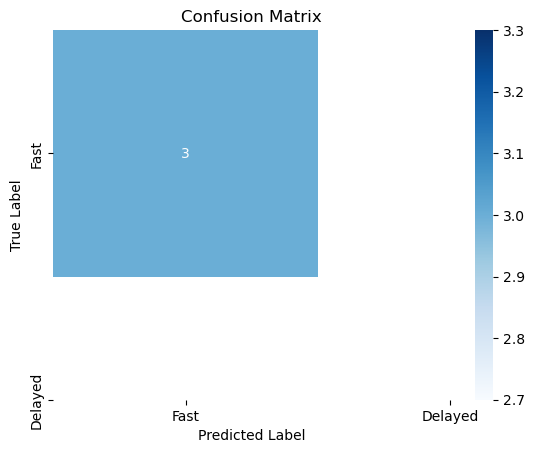

In [656]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fast', 'Delayed'], yticklabels=['Fast', 'Delayed'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'linear_regression_model' is not defined